In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import yfinance as yf

df = pd.read_csv('data/merged_df.csv')

In [35]:
# Drop the first column (usually the index column)
df.drop(df.columns[0], axis=1, inplace=True)

# Convert 'Date' to datetime, forcing errors to NaT (Not a Time) in case of issues
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check the data type
print(df['Date'].dtype)  # Should be datetime64[ns]

df.head()

datetime64[ns]


,Date,Open,High,Low,Close,Volume,Date.1,cpi,unemployment,consumer_confidence,interest_rate
0,2015-02-01,168.072885,178.314369,166.232945,176.986923,1901638100,2015-02-01,234.722,5.5,95.4,0.11
1,2015-03-01,177.087690,178.163086,171.492260,173.433014,2749923000,2015-03-01,236.119,5.4,93.0,0.11
2,2015-04-01,174.173461,179.312836,172.586916,175.920349,2036685200,2015-04-01,236.599,5.4,95.9,0.12
3,2015-05-01,176.713578,180.409883,174.485671,178.181976,1892519900,2015-05-01,237.805,5.6,90.7,0.12
4,2015-06-01,178.857087,180.038548,173.236681,173.717712,2535242600,2015-06-01,238.638,5.3,96.1,0.13


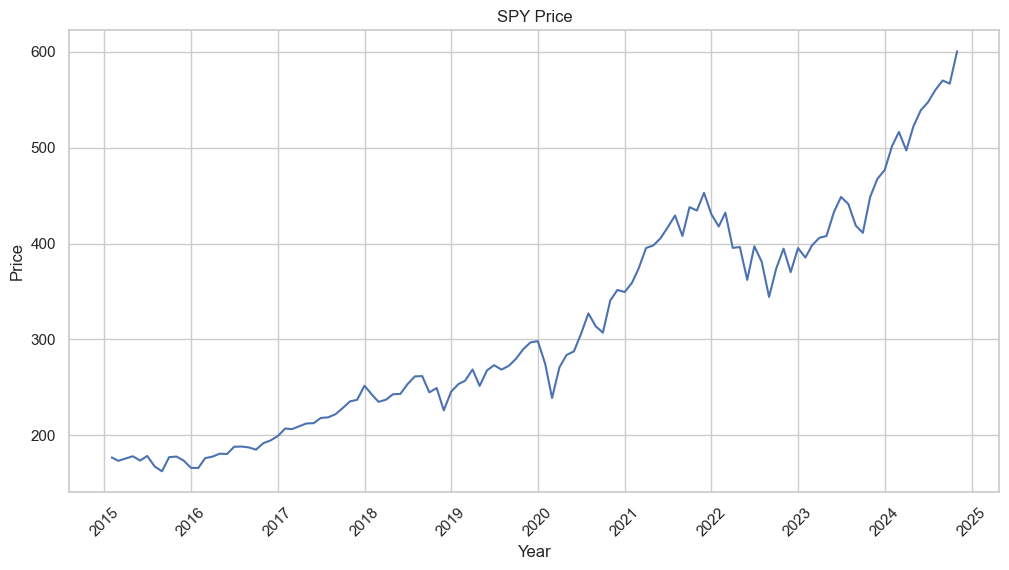

In [37]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Format x-axis to show only the year
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('SPY Price')

# Rotate labels if necessary
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'SPY Monthly Returns')

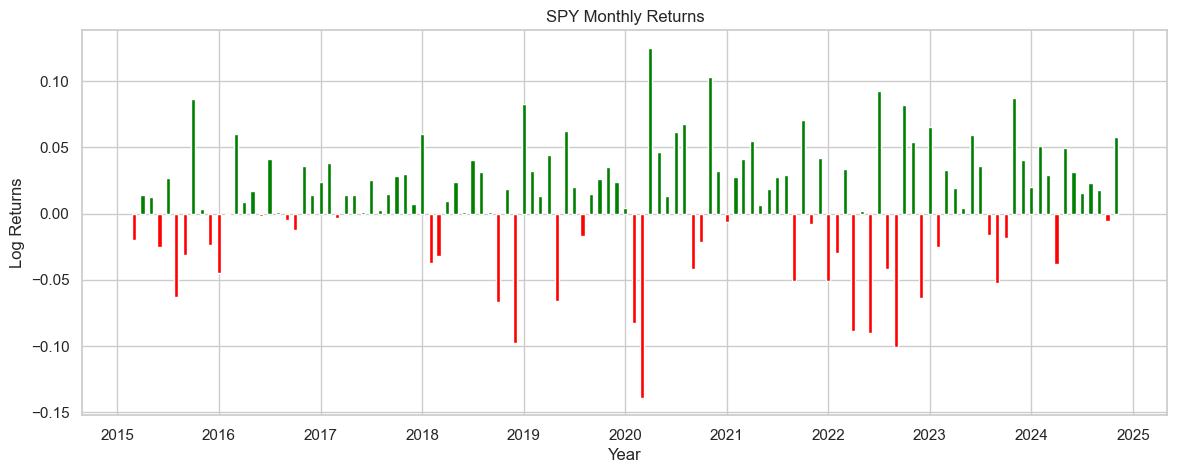

In [39]:
# Calculate log returns
sns.set(style='whitegrid')
df['log_returns'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
plt.figure(figsize=(14,5))
plt.bar(df['Date'], df['log_returns'], color=['green' if r > 0 else 'red' for r in df['log_returns']], width=15)
plt.xlabel('Year')
plt.ylabel('Log Returns')
plt.title('SPY Monthly Returns')

In [40]:
# Add rolling volatility column
window_size = 12
df['volatility'] = df['log_returns'].rolling(window_size).std()

Text(0.5, 1.0, '12-month Rolling Volatility')

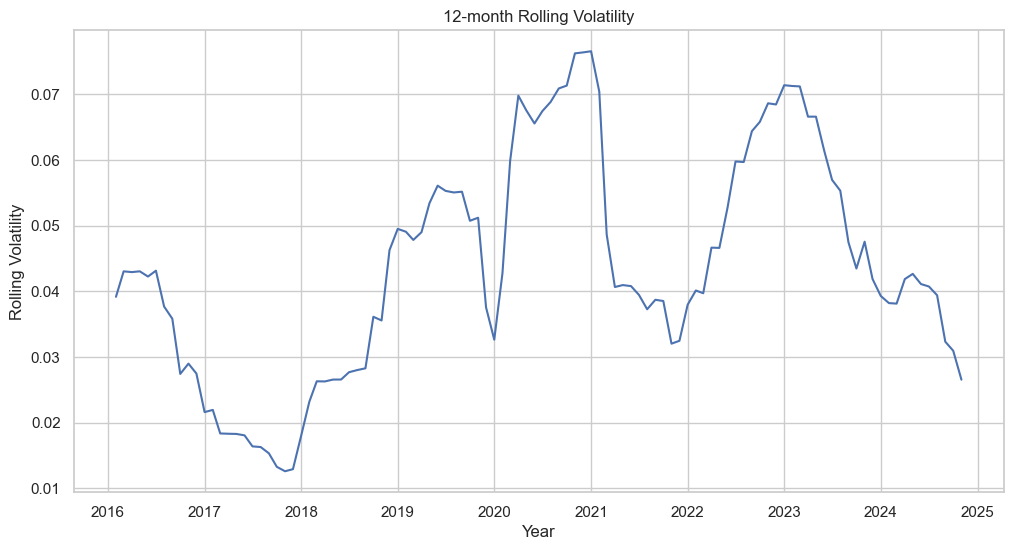

In [45]:
# Plot rolling volatility
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['volatility'])
plt.xlabel('Year')
plt.ylabel('Rolling Volatility')
plt.title(f'{window_size}-month Rolling Volatility')

In [42]:
# Add a range column
df['range'] = df['High'] - df['Low']

Text(0.5, 1.0, 'Monthly Range (High - Low)')

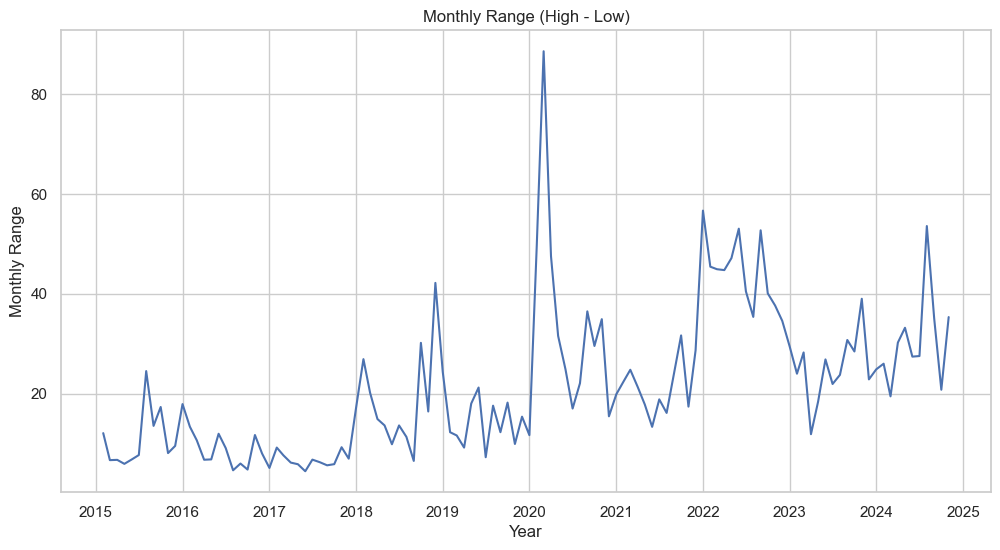

In [43]:
# Plot monthly range
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['range'])
plt.xlabel('Year')
plt.ylabel('Monthly Range')
plt.title('Monthly Range (High - Low)')

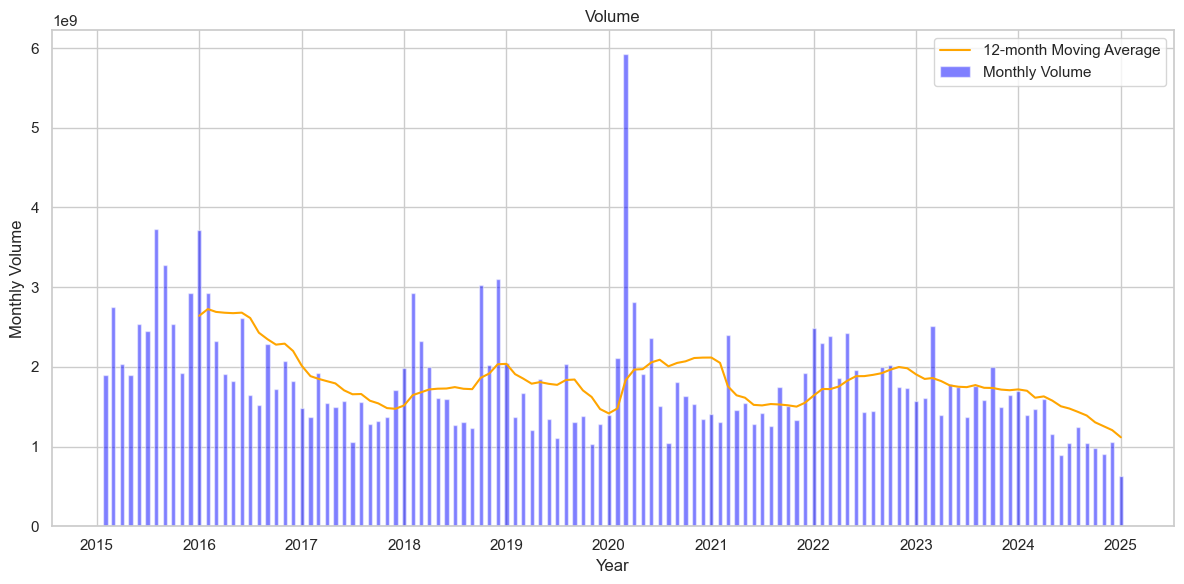

In [9]:
# Create a moving average for volume
ma_window = 12
df['volume_ma'] = df['Volume'].rolling(window=ma_window).mean()

# Plot monthly volume
sns.set(style='whitegrid')

plt.figure(figsize=(12,6))
plt.bar(df['Date'], df['Volume'], color='blue', alpha=0.5, width=15, label='Monthly Volume')
plt.plot(df['Date'], df['volume_ma'], color='orange', label=f'{ma_window}-month Moving Average')
plt.xlabel('Year')
plt.ylabel('Monthly Volume')
plt.title('Volume')

plt.legend()
plt.tight_layout()